## Final Project Submission

Please fill out:
* Student name: Carl Cook
* Student pace: Part-time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Obtain

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# get the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Scrub

## Check data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


* 'id' is just an identifier and should have no bearing on the model.
* 'date' and 'sqft_basement' are strings
* Everything else is numeric.
* We can probably remove 'sqft_above' and make 'sqft_basement' binary.
* 'waterfront' is binary


In [4]:
df_scrub = df.copy()
columns = df_scrub.columns
for col in columns:
    print(f'{col}: {df[col].nunique()} unique {type(df[col][0])}')

id: 21420 unique <class 'numpy.int64'>
date: 372 unique <class 'str'>
price: 3622 unique <class 'numpy.float64'>
bedrooms: 12 unique <class 'numpy.int64'>
bathrooms: 29 unique <class 'numpy.float64'>
sqft_living: 1034 unique <class 'numpy.int64'>
sqft_lot: 9776 unique <class 'numpy.int64'>
floors: 6 unique <class 'numpy.float64'>
waterfront: 2 unique <class 'numpy.float64'>
view: 5 unique <class 'numpy.float64'>
condition: 5 unique <class 'numpy.int64'>
grade: 11 unique <class 'numpy.int64'>
sqft_above: 942 unique <class 'numpy.int64'>
sqft_basement: 304 unique <class 'str'>
yr_built: 116 unique <class 'numpy.int64'>
yr_renovated: 70 unique <class 'numpy.float64'>
zipcode: 70 unique <class 'numpy.int64'>
lat: 5033 unique <class 'numpy.float64'>
long: 751 unique <class 'numpy.float64'>
sqft_living15: 777 unique <class 'numpy.int64'>
sqft_lot15: 8682 unique <class 'numpy.int64'>


## Dealing with null values

waterfront: 2376 null values


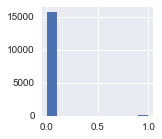

view: 63 null values


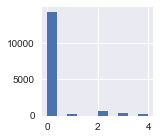

yr_renovated: 3842 null values


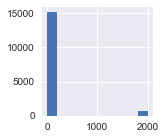

In [5]:
for col in columns:
    if df[col].isna().sum() > 0:
        print(f'{col}: {df[col].isna().sum()} null values')
        fig, ax = plt.subplots(figsize=(2,2))
        ax.hist(df.dropna()[col])
        plt.show()

Since these columns are all very heavy on zeroes, we'll just replace the null values with zero.

In [6]:
df_scrub = df_scrub.fillna(0)

Let's make a categorical column for basement

In [7]:
df_scrub['sqft_basement'] = df_scrub['sqft_living'] - df_scrub['sqft_above']
df_scrub['basement'] = [1 if x > 0 else 0 for x in df_scrub['sqft_basement']]
df_scrub = df_scrub.drop(columns='sqft_basement')

Let's do the same with renovation.

In [8]:
df_scrub['renovated'] = [1 if x > 0 else 0 for x in df_scrub['yr_renovated']]
df_scrub = df_scrub.drop(columns='yr_renovated')

## Categoricals

In [10]:
df_scrub.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


### Date

In [11]:
for i in range(len(df_scrub)):
    date_temp = df_scrub.date[i].split('/')
    del date_temp[1]
    df_scrub.date[i] = '_'.join(date_temp)

C:\Users\katma\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
date

### Zipcode

In [12]:
# Thanks to Chris for this lovely dictionary!

subregion_dict = {'south_urban': [98001, 98002, 98003, 98023, 98030, 98031, 98032, 98042, 
                                 98055, 98056, 98058, 98092, 98148, 98166, 98168, 98178, 98188,
                                 98198], 
                 'east_urban' : [98004, 98005, 98006, 98007, 98008, 98009, 98027, 98029, 
                                 98033, 98034, 98039, 98040, 98052, 98053, 98059, 98074, 
                                98075, 98077],
                 'south_rural' : [98010, 98022, 98038],
                 'north' : [98011, 98028, 98072, 98155],
                 'east_rural' : [98014, 98019, 98024, 98045, 98065],
                 'vashon_island' : [98070], 
                 'seattle' : [98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
                             98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136, 98144, 98199], 
                 'north_and_seattle' : [98133, 98177], 
                 'south_and_seattle' : [98146]}

In [13]:
regions = []
for i in range(len(df_scrub)):
    zip_val = df_scrub.zipcode[i]
    for key, val in subregion_dict.items():
        if zip_val in val:
            regions.append(key)
df_scrub['region'] = regions

In [14]:
df_scrub.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated,region
0,7129300520,10_2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,1955,98178,47.5112,-122.257,1340,5650,0,0,south_urban
1,6414100192,12_2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,1951,98125,47.7210,-122.319,1690,7639,1,1,seattle
2,5631500400,2_2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,1933,98028,47.7379,-122.233,2720,8062,0,0,north
3,2487200875,12_2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,1965,98136,47.5208,-122.393,1360,5000,1,0,seattle
4,1954400510,2_2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,1987,98074,47.6168,-122.045,1800,7503,0,0,east_urban


## Outliers

In [91]:
df_ol = df_scrub.drop(columns=['id', 'date', 'waterfront', 'basement', 'renovated', 'view'])

In [92]:
columns = df_ol.columns

for col in columns:
    z = np.abs(stats.zscore(df_ol[col]))
    num_ol = (z > 3).sum()
    print(f'{col}: {num_ol} outliers')

price: 406 outliers
bedrooms: 62 outliers
bathrooms: 187 outliers
sqft_living: 248 outliers
sqft_lot: 346 outliers
floors: 7 outliers
condition: 29 outliers
grade: 130 outliers
sqft_above: 253 outliers
yr_built: 0 outliers
zipcode: 0 outliers
lat: 0 outliers
long: 232 outliers
sqft_living15: 236 outliers
sqft_lot15: 363 outliers


In [93]:
z = np.abs(stats.zscore(df_ol))
df_olr = df_ol[(z <= 3).all(axis=1)]

In [94]:
removed = df_scrub.shape[0] - df_olr.shape[0]
print(f'df_scrub: {df_scrub.shape}')
print(f'df_olr: {df_olr.shape}')
print(f'{removed} rows removed.')
print(f'{round((removed/df_scrub.shape[0])*100 , 2)}% data loss.')

df_scrub: (21597, 21)
df_olr: (20098, 15)
1499 rows removed.
6.94% data loss.


## Normalize

In [95]:
df_norm = (df_olr - df_olr.mean()) / df_olr.std()

In [96]:
df_norm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.109919,-0.389395,-1.517994,-1.055903,-0.373296,-0.890659,-0.649425,-0.542718,-0.743198,-0.523034,1.824446,-0.358462,-0.255384,-0.965366,-0.390596
1,0.162010,-0.389395,0.277984,0.773222,-0.236598,0.965754,-0.649425,-0.542718,0.660961,-0.659231,0.840438,1.148211,-0.737115,-0.390476,-0.171919
2,-1.278518,-1.555550,-1.517994,-1.595430,0.000219,-0.890659,-0.649425,-1.503228,-1.324719,-1.272118,-0.960483,1.269578,-0.068908,1.301344,-0.125412
3,0.427582,0.776760,1.355572,-0.029487,-0.429108,-0.890659,2.444233,-0.542718,-0.927583,-0.182541,1.044666,-0.289520,-1.312084,-0.932515,-0.462060
4,0.049343,-0.389395,-0.081211,-0.397945,-0.164643,-0.890659,-0.649425,0.417792,-0.034027,0.566543,-0.106438,0.399901,1.391824,-0.209796,-0.186871


# Explore

# Model

# iNterpret